In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import tensorflow as tf


In [2]:
#pip install keras # installing keras to use kerasclassifier to convert to sklearn model for gridsearch.

In [3]:
bankdata = pd.read_csv("bank.csv")
bankdata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data has both categoral and continous columns. target variable is 0 and 1. Hence it is a classification model. RowNumber, CustomerID, Surname can be removed. Going further need to onehotencode Gerography and Gender.

In [4]:
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


for age column, 75% and max seem to huge margin. could be outliers are present.
Balance also has huge margin. 
mean and std for creditscore look fine.


In [5]:
bankdata.shape

(10000, 14)

In [6]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Data has 14 columns and all have 10000 entries. after looking at data, it doesnt have any garbage values. And no null values from below.

In [7]:
bankdata.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
bankdata.drop(["Surname", "RowNumber","CustomerId"],axis=1,inplace = True)
#removing above coluns has they are unique values and wont benifit while using any algorithm.

In [9]:
bankdata["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder 
 
    #job, age, education, marital, month, contact, poutcome,default usinf
le = LabelEncoder() 
  
bankdata['Geography']= le.fit_transform(bankdata['Geography']) 
bankdata['Gender']= le.fit_transform(bankdata['Gender']) 

#bankdata= pd.get_dummies(bankdata, columns=['Geography','Gender'])

Using labelencoding than one hot encoding as, label encoding gives better results while evaluating data.

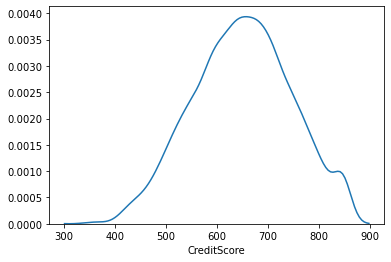

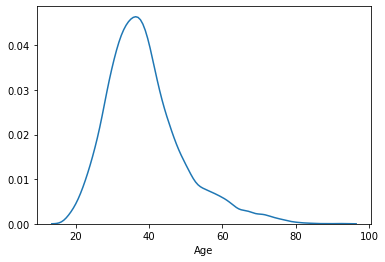

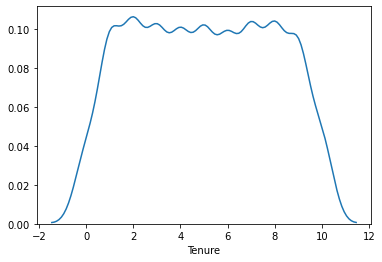

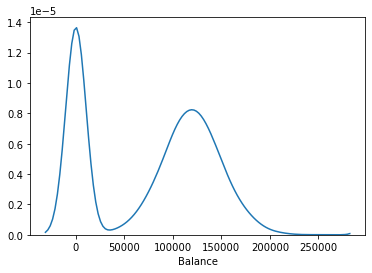

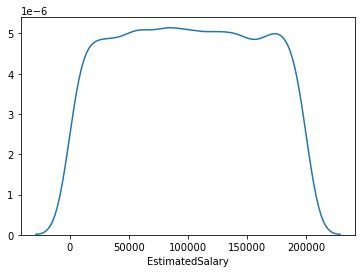

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
columns=["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

for i in columns:
    sns.distplot(bankdata[i],hist=False)
    plt.show()

Most of the customers have zero balance. CreditScore in the range of 600-700. Estimated Salary and Tenure are equally distributed.

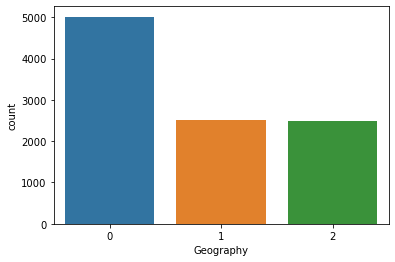

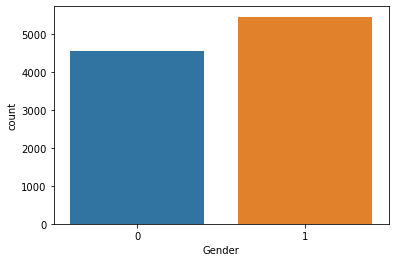

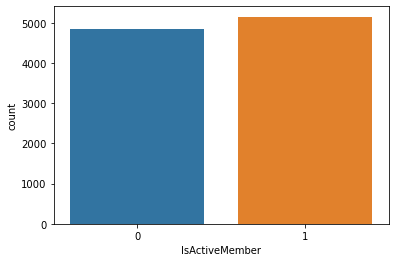

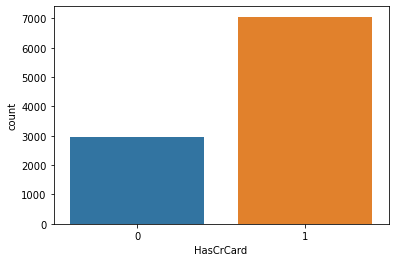

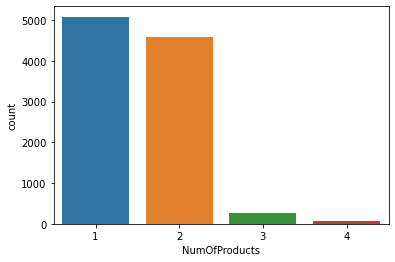

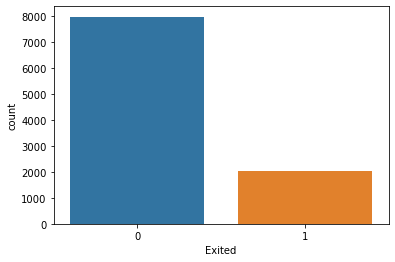

In [12]:
columns=["Geography","Gender","IsActiveMember","HasCrCard","NumOfProducts","Exited"]

for i in columns:
    sns.countplot(bankdata[i])
    plt.show()

customers with age around 40 are higher in the bank.
Most of the ppl have zero balance.
most of customers have less than 2 products
Majority of customers have credit card.
Looks like active members and non active members are equal.


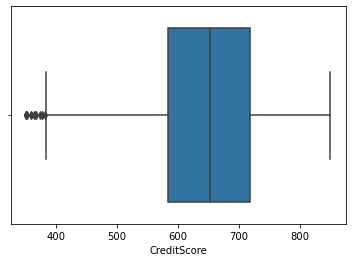

In [13]:
#checking outliers
sns.boxplot(bankdata['CreditScore'])


CreditScore has some outliers, looks as if not many of them. Will use quadrant method to see if outliers hav to significant enough to remove them.


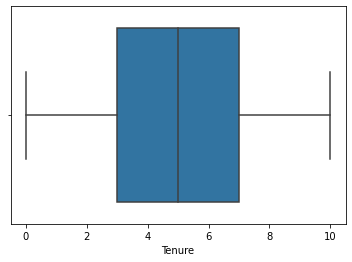

In [14]:
sns.boxplot(bankdata['Tenure'])


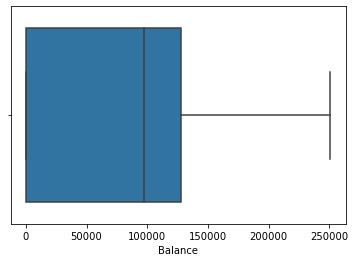

In [15]:
sns.boxplot(bankdata['Balance'])


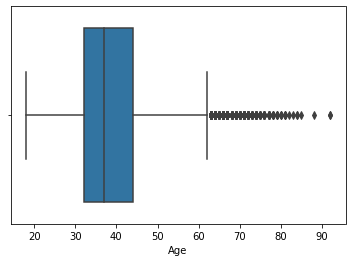

In [16]:
sns.boxplot(bankdata['Age'])


Age has many outliers. Need to remove them. Tenure and Balance look good.

**insights**
age has many outliers


In [17]:
q1_c= bankdata['CreditScore'].quantile(0.25)
q3_c= bankdata['CreditScore'].quantile(0.75)
IQR_c = q3_c-q1_c
IQR_c
outliers_cr =((bankdata['CreditScore'] > (q3_c+1.5*IQR_c))  | (bankdata['CreditScore']  < (q1_c-1.5*IQR_c))).sum()
outliers_cr

15

Not many, hence wont be changing the data.

In [18]:
q1= bankdata['Age'].quantile(0.25)
q3= bankdata['Age'].quantile(0.75)
IQR = q3-q1
IQR

12.0

In [19]:
outliers =((bankdata['Age'] > (q3+1.5*IQR))  | (bankdata['Age']  < (q1-1.5*IQR))).sum()
outliers


359

In [20]:
age1= bankdata['Age']
#age1= pd.to_numeric(age1, errors="coerce")
cut_age = ['<30', '<35', '<40', '<60','<100']
cut_bins =[0,30, 35, 40, 60,100]
age1 = pd.cut(age1, bins=cut_bins, labels = cut_age)
bankdata['Age'] =age1
bankdata['Age']= le.fit_transform(bankdata['Age']) 


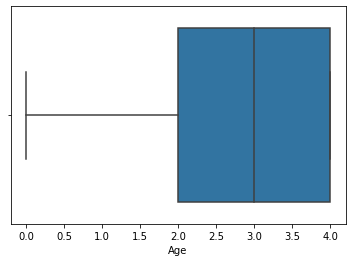

In [21]:
sns.boxplot(bankdata['Age'])

Used cut method to remove the outliers from the Age variable.

import seaborn as sns
sns.pairplot(data=bankdata, diag_kind='kde')

corr = bankdata.corr()

plt.figure(figsize=(10,15))
sns.heatmap(data = corr,annot = True)

age and balance are only correlated better with Exited.


In [22]:
bankdata

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,4,2,0.00,1,1,1,101348.88,1
1,608,2,0,4,1,83807.86,1,0,1,112542.58,0
2,502,0,0,4,8,159660.80,3,1,0,113931.57,1
3,699,0,0,3,1,0.00,2,0,0,93826.63,0
4,850,2,0,4,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,3,5,0.00,2,1,0,96270.64,0
9996,516,0,1,2,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,3,7,0.00,1,0,1,42085.58,1
9998,772,1,1,4,3,75075.31,2,1,0,92888.52,1


# bivariate Analysis

In [23]:
for column in bankdata.columns:
    print(bankdata[column].name)

CreditScore
Geography
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


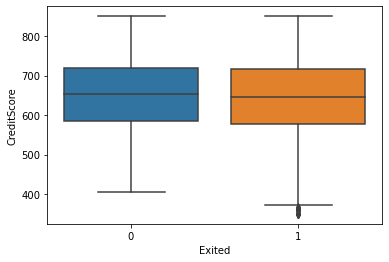

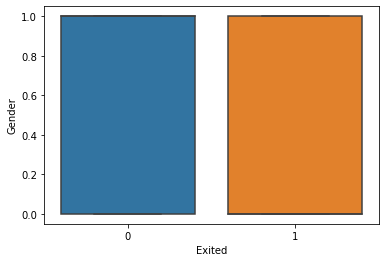

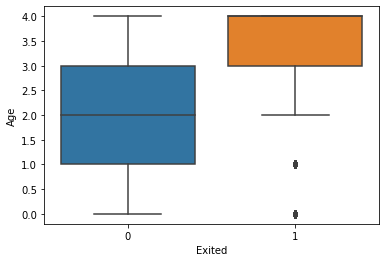

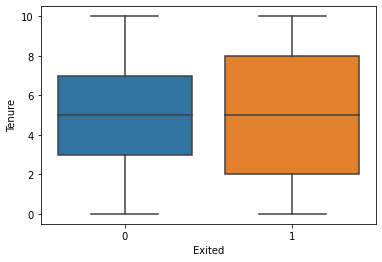

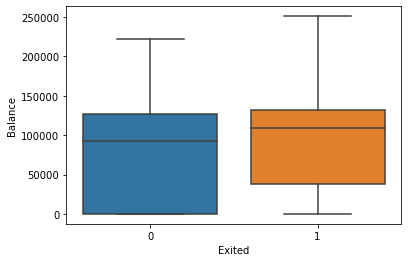

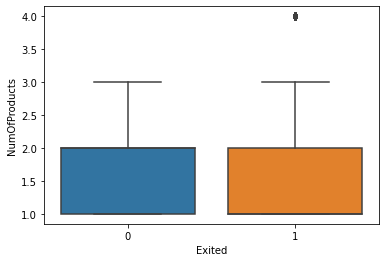

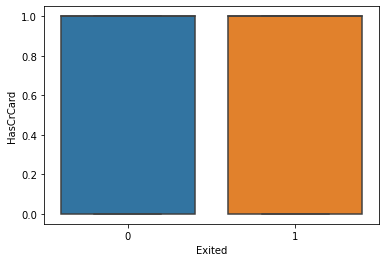

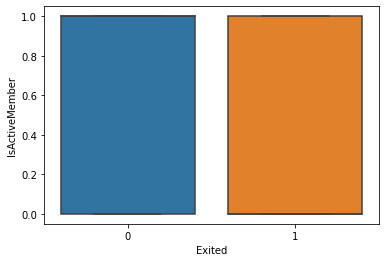

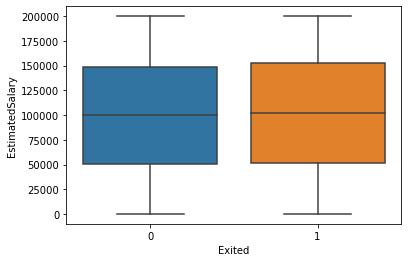

In [24]:
for i in ['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']:
    sns.boxplot(x='Exited',y=i,data=bankdata)
    plt.show()

**insights**
gender, NumOfProducts, HasCrCard, IsActiveMember doesnt have any change with respect to Exited.


In [25]:
np.round(bankdata.groupby(["Exited"]).mean() ,1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,651.9,0.7,0.6,2.4,5.0,72745.3,1.5,0.7,0.6,99738.4
1,645.4,0.8,0.4,3.2,4.9,91108.5,1.5,0.7,0.4,101465.7


EstimatedSalary,Balance, Age, Tenure seem to be effecting the Exited variable.
CreditScore,numof products, hascrard are same for both exited and present customers.


C:\Users\srisi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


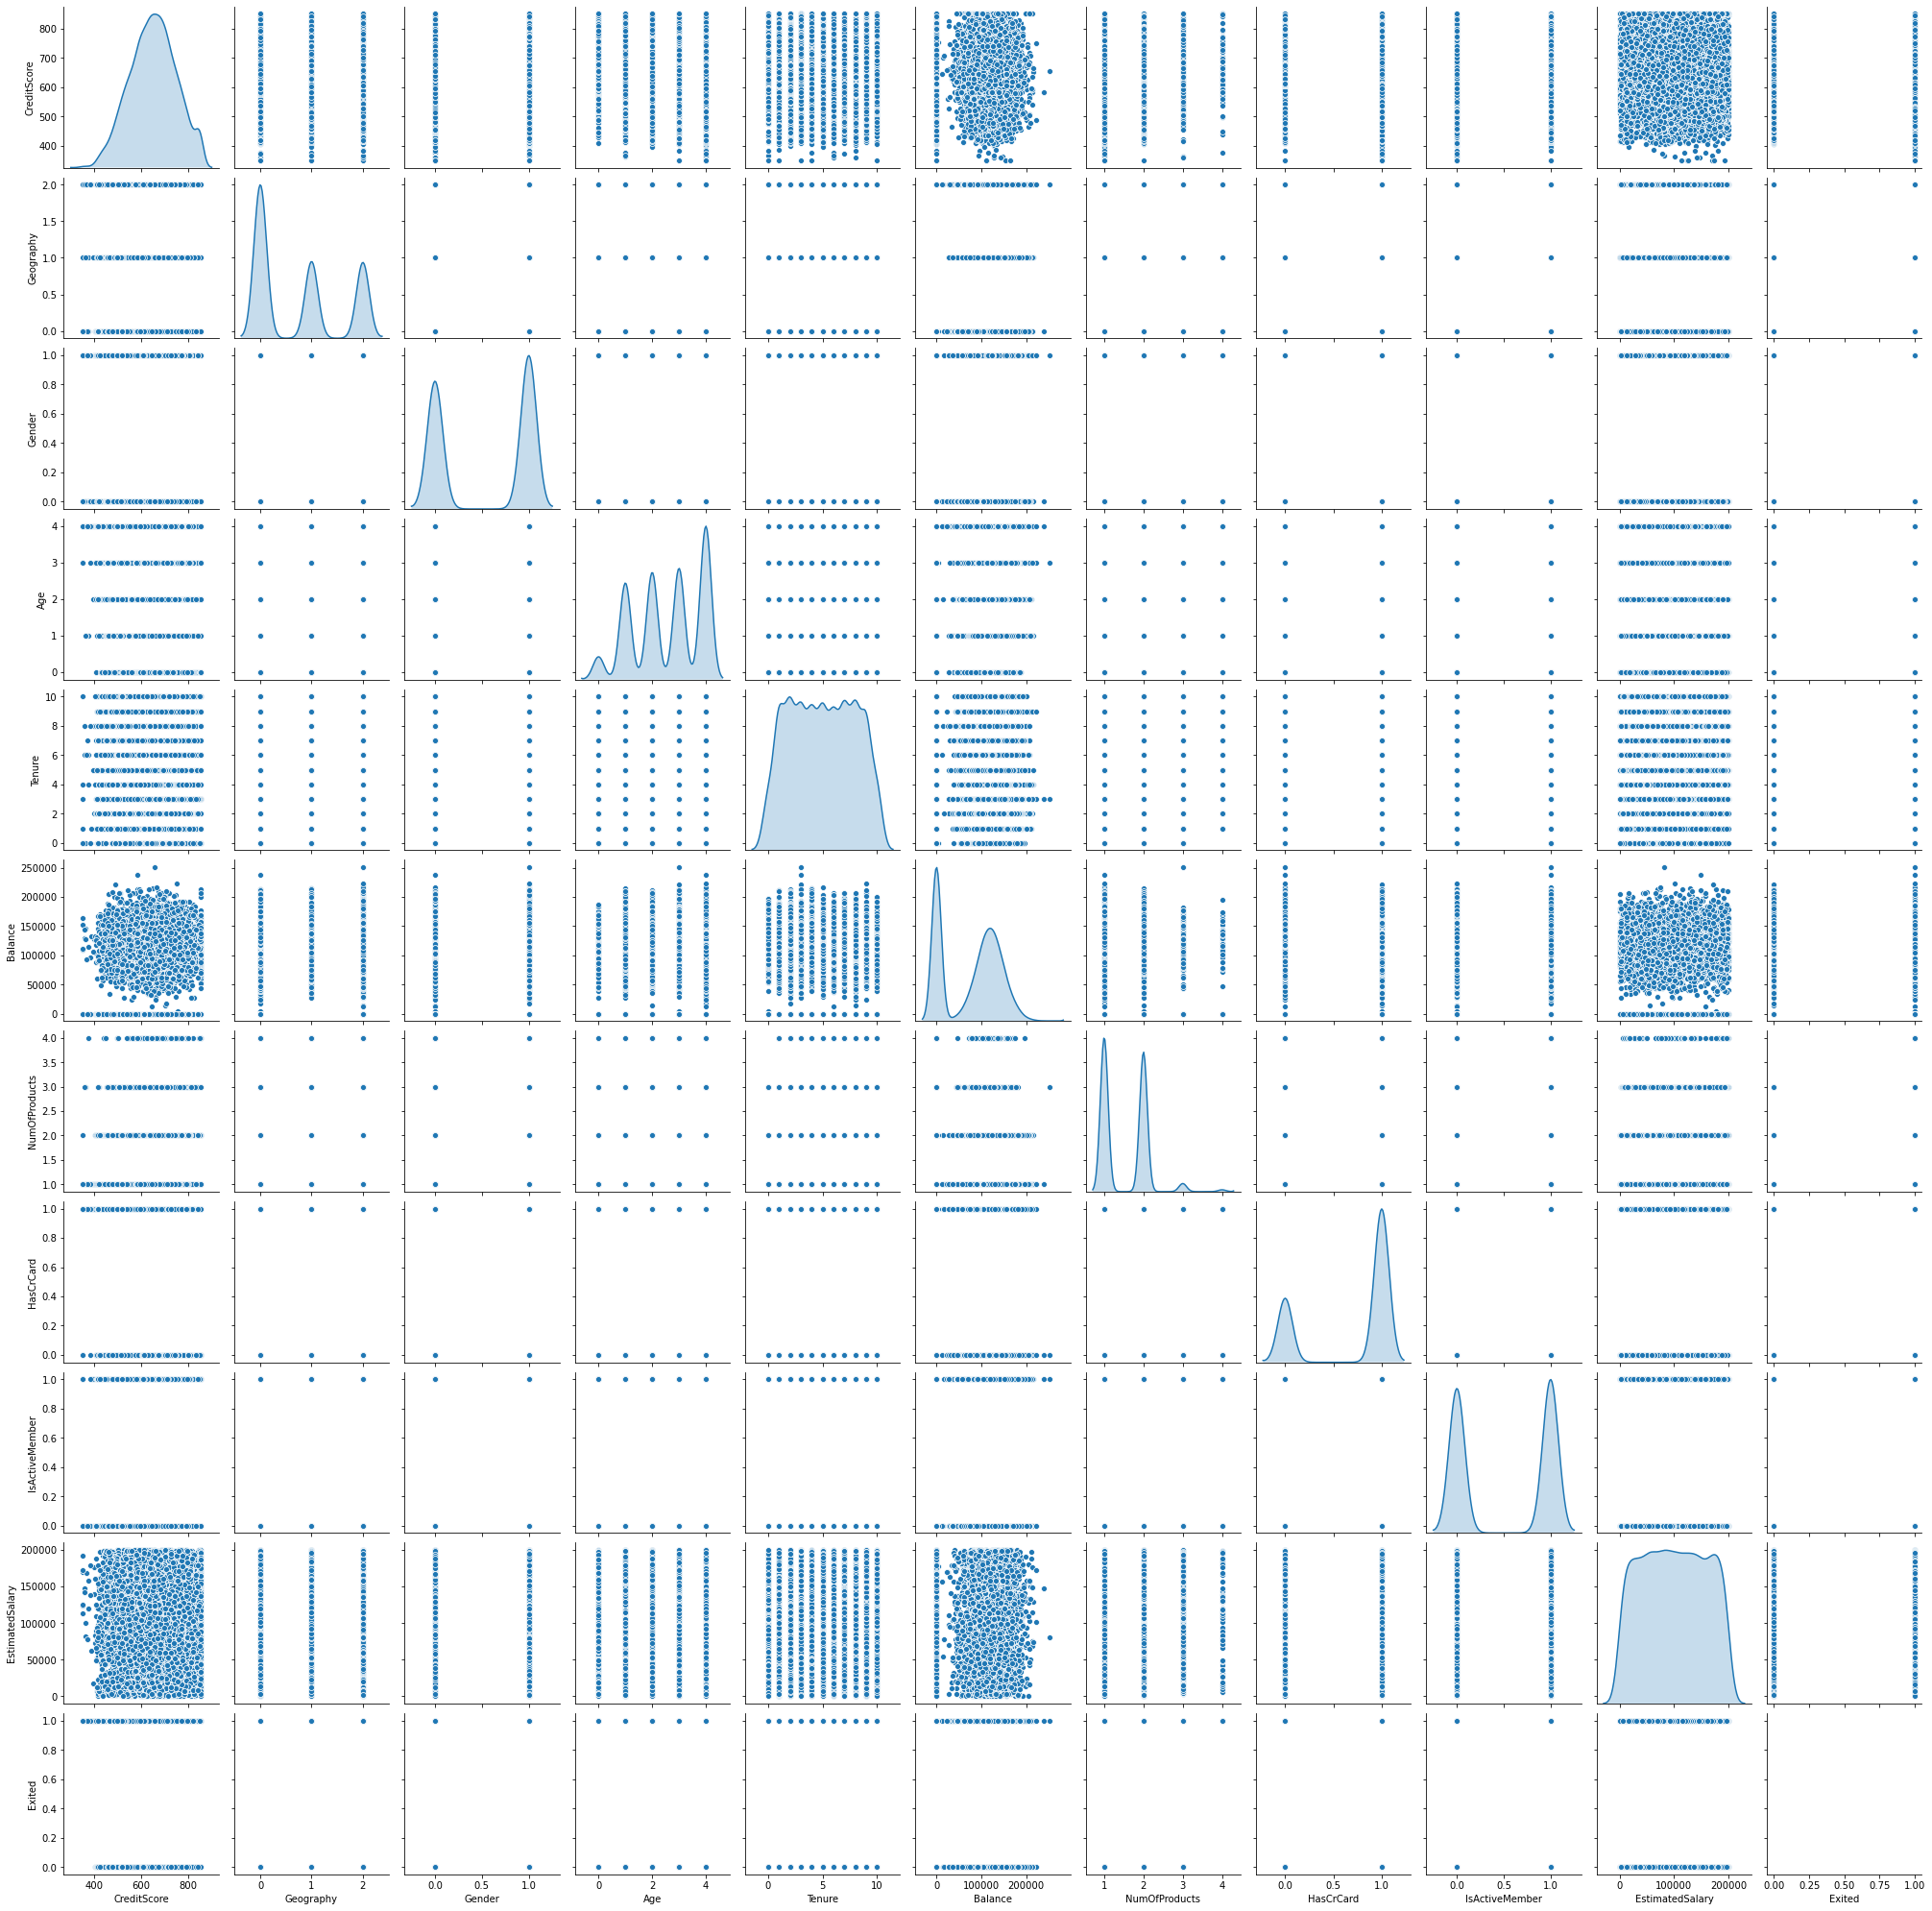

In [26]:
import seaborn as sns
sns.pairplot(data=bankdata, diag_kind='kde')

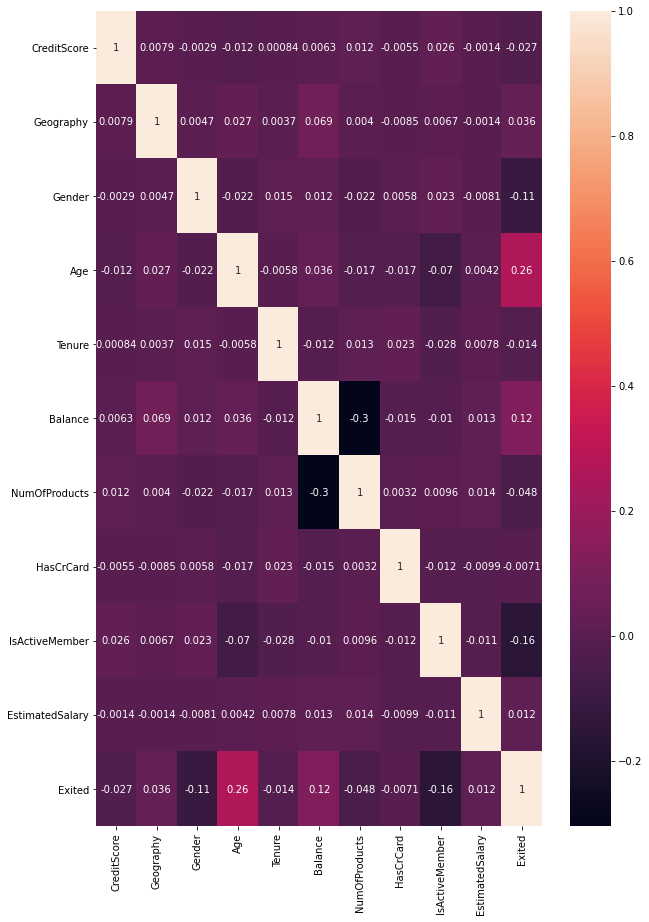

In [27]:
corr = bankdata.corr()

plt.figure(figsize=(10,15))
sns.heatmap(data = corr,annot = True)

Age and exited are positively correlated. balance also is correlated with 0.12.
least correlated are hascrcard, numofproducts. I think we can remove these 2 from training set. lets see first keeping them, then wil remove while checking feature importance.

## Neural Networks

In [28]:
from sklearn.model_selection import train_test_split


#Splitting Data
splitData = bankdata

X = splitData.drop("Exited" , axis=1)
y=splitData.pop("Exited")



In [29]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,4,2,0.00,1,1,1,101348.88
1,608,2,0,4,1,83807.86,1,0,1,112542.58
2,502,0,0,4,8,159660.80,3,1,0,113931.57
3,699,0,0,3,1,0.00,2,0,0,93826.63
4,850,2,0,4,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,3,5,0.00,2,1,0,96270.64
9996,516,0,1,2,10,57369.61,1,1,1,101699.77
9997,709,0,0,3,7,0.00,1,0,1,42085.58
9998,772,1,1,4,3,75075.31,2,1,0,92888.52


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [31]:
from sklearn.preprocessing import StandardScaler

#Normalizing Training and Testing data

scaler= StandardScaler().fit()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [94]:
X_train

array([[-0.34459497,  1.50730692, -1.09823226, ...,  0.64598061,
         0.97071435,  1.24821373],
       [-0.09518109,  0.30201238, -1.09823226, ..., -1.54803408,
         0.97071435,  1.52122527],
       [-0.94734518, -0.90328217,  0.91055421, ..., -1.54803408,
        -1.03016917,  1.2636148 ],
       ...,
       [ 0.86090545, -0.90328217, -1.09823226, ..., -1.54803408,
        -1.03016917, -0.14925893],
       [ 0.15423279, -0.90328217,  0.91055421, ...,  0.64598061,
        -1.03016917, -0.05754351],
       [ 0.46600014,  0.30201238,  0.91055421, ...,  0.64598061,
         0.97071435, -0.81942612]])

# Deep Neural Network

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [33]:
# first need to wrap your Sequential() model into a user-defined function:

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

 

def create_model(optimizer='rmsprop',neurons=8, act='relu'):

    model = Sequential()

    # first hidden layer

    model.add(Dense(neurons, activation=act, kernel_initializer='normal'))


    model.add(Dense(neurons, activation=act))

    model.add(Dense(1, activation = 'sigmoid'))

   

    # don't forget to specify the optimizer and the loss function

    #adam = tf.keras.optimizers.Adam(learning_rate = 0.01)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

   

    return model

In [34]:

#  apply GridSearchCV to the neural network model

model = KerasClassifier(build_fn=create_model, verbose=0)

act = ['relu','sigmoid','tanh']
batch_size = [16, 32, 64]
epochs = [25, 50, 100]
optimizers = ['adam','SGD','rmsprop']
neurons = [8,10,20,30]


param_grid = dict(optimizer = optimizers, batch_size=batch_size, epochs=epochs, neurons=neurons, act=act)

 

# you can modify the hyperparameters here

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=4, cv=3,verbose = True)

grid_result = grid.fit(X_train, y_train)

 

# best combination of the parameters from grid search

grid_result.best_params_



Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  9.9min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 21.5min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 36.6min
[Parallel(n_jobs=4)]: Done 972 out of 972 | elapsed: 42.4min finished


{'act': 'tanh',
 'batch_size': 64,
 'epochs': 50,
 'neurons': 30,
 'optimizer': 'rmsprop'}

###  Using the best parameters got from the grid search on various hyperparameters.


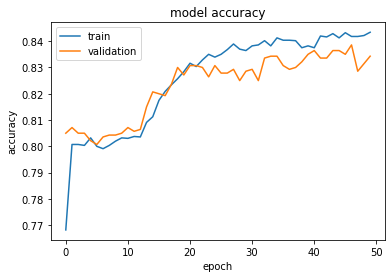

In [53]:
model=Sequential()

model.add(Dense(30, activation='tanh', kernel_initializer='normal'))

#Add second hidden layer
model.add(Dense(20, activation = 'tanh', kernel_initializer='normal'))

model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=50, batch_size=64, validation_split=0.2,verbose= False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

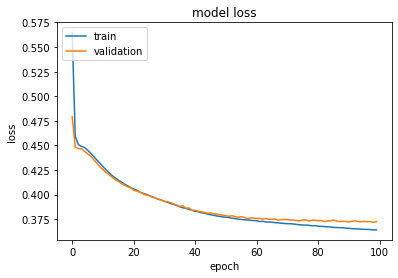

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The plot on loss shows that the model has converged and has reasonable loss on both datasets.'
The plot on accuracy shows that the model has converged at almost at 1st epoch, but has lot of bumps and there is a bit of overfitting too.

Will remove second hidden layer and see how it does.



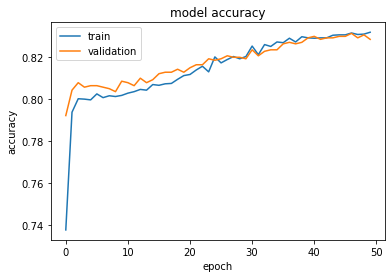

In [54]:

model=Sequential()

model.add(Dense(10, activation='tanh', kernel_initializer='normal'))

#Add second hidden layer
#model.add(Dense(10, activation = 'tanh', kernel_initializer='normal'))

model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=50, batch_size=64, validation_split=0.2,verbose= False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

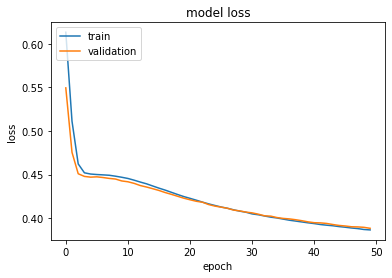

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The plot on loss shows that the model has converged and has reasonable loss on both datasets.'
The plot on accuracy shows that the model has converged at almost at 1st epoch for training set,and there is no proper convergence for validation data.And has lot of bumps and there is a bit of overfitting too.

The plotshows that the model has converged and has reasonable loss on both datasets.

In [37]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.852
Loss: 0.356


There is 85% accuracy by using best parameters on the data, but the graph shows that there is a overfit with the validation data. the model converged, but the shape of the loss surface is not as smooth.

### Trying various hyperparameters

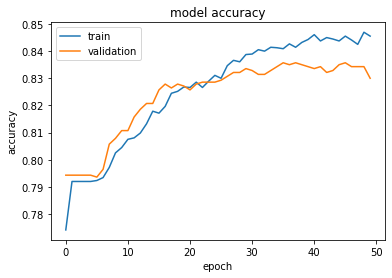

In [58]:
model=Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='normal'))

#Add second hidden layer
#model.add(Dense(10, activation = 'tanh', kernel_initializer='normal'))

# sigmoid is by default to be used as output layer for the binary classification.
model.add(Dense(1, activation = 'sigmoid'))

optimizer= tf.keras.optimizers.Adam(0.001)

# binary_crossentropy is the loss function to be used for binary classification. 
model.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])
epochs=50
history = model.fit(X_train, y_train,epochs=epochs,  batch_size= 24, validation_split=0.2,verbose= False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Graph clearly shows that there is no convergence with accuracy and its definetly overfit.


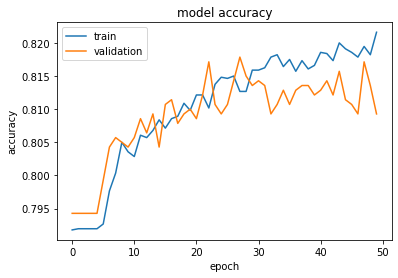

In [67]:
model=Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='normal'))

#Add second hidden layer
model.add(Dense(10, activation = 'relu', kernel_initializer='normal'))

model.add(Dense(1, activation = 'sigmoid'))

optimizer= tf.keras.optimizers.Adam(0.001)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
epochs=50
history = model.fit(X_train, y_train,epochs=epochs, validation_split=0.2,verbose= False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

It has good accuracy score at epoch 10, but its a overfit. 

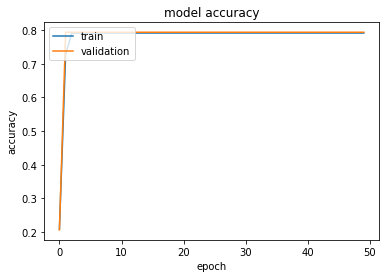

In [77]:
model=Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='normal'))

#Add second hidden layer
model.add(Dense(10, activation = 'sigmoid', kernel_initializer='normal'))

model.add(Dense(1, activation = 'sigmoid'))

optimizer= tf.keras.optimizers.SGD(0.002)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
epochs=50
history = model.fit(X_train, y_train,epochs=epochs, validation_split=0.2,verbose= False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The plot on accuracy shows that the model has converged at almost at 1st epoch for training setand validation data and it is smooth. this is a good fit.

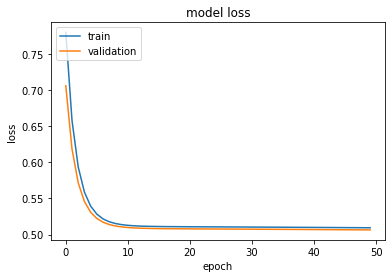

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The plot on loss shows that the model has converged and has reasonable loss on both datasets.'


In [79]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.805
Loss: 0.492


### Predict the results using 0.5 as a threshold

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

Y_predict = (model.predict_classes(X_test))>=0.5
print('Recall_score: ' + str(recall_score(y_test.values,Y_predict)))
print('accuracy_Score: ' + str(accuracy_score(y_test.values,Y_predict)))

print('Precision_score: ' + str(precision_score(y_test.values, Y_predict)))
print('F-score: ' + str(f1_score(y_test.values,Y_predict)))
confusion_matrix(y_test.values, Y_predict)

Recall_score: 0.0
accuracy_Score: 0.8053333333333333
Precision_score: 0.0
F-score: 0.0


array([[2416,    0],
       [ 584,    0]], dtype=int64)

Predicted the test data with 0.5 threshold. Although for binary classification, the default threshold is 0.5. Hence the result with our without 0.5 threshold will be the same.

In [87]:

Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('accutacy_Score: ' + str(accuracy_score(y_test.values,Y_pred_cls)))

print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

94/94 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.8053
Accuracy Model1 (Dropout): 0.8053333163261414
Recall_score: 0.0
accutacy_Score: 0.8053333333333333
Precision_score: 0.0
F-score: 0.0


array([[2416,    0],
       [ 584,    0]], dtype=int64)

###### **insights**
Precision and recall score are zero that means there are no positive cases on data. so no conclusion about how positive cases are handled. Hence going back to best parameters given by gridsearch again and check confusion matrix on the same if accuracy plot is good.

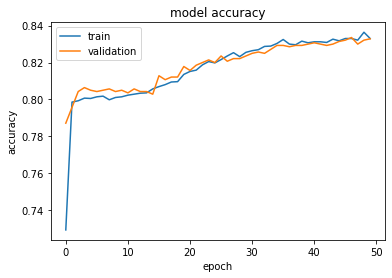

In [89]:
model=Sequential()

model.add(Dense(10, activation='tanh', kernel_initializer='normal'))

#Add second hidden layer
#model.add(Dense(10, activation = 'tanh', kernel_initializer='normal'))

model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=50, batch_size=64, validation_split=0.2,verbose= False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The accuracy plot shows, there is a smooth convergence fot the training data and although the convergence magnitude is not as smooth as training data,validation line is almost sync with the training data. little bumps are there, may b they can b avoided with hanging learnig rate or batch size.

In [90]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.849
Loss: 0.372


far better accuracy score than the other hyperparameters.
An loss also is better.


In [91]:

Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('accutacy_Score: ' + str(accuracy_score(y_test.values,Y_pred_cls)))

print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

94/94 [==============================] - 0s 1ms/step - loss: 0.3720 - accuracy: 0.8493
Accuracy Model1 (Dropout): 0.8493333458900452
Recall_score: 0.3801369863013699
accutacy_Score: 0.8493333333333334
Precision_score: 0.7115384615384616
F-score: 0.49553571428571436


array([[2326,   90],
       [ 362,  222]], dtype=int64)

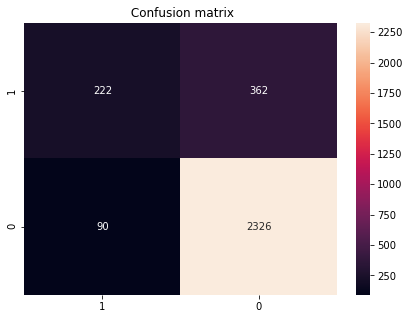

In [93]:
from sklearn import metrics

cm=metrics.confusion_matrix(y_test, Y_pred_cls, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["1","0"]])
plt.figure(figsize = (7,5))
plt.title(" Confusion matrix")
sns.heatmap(df_cm,fmt='g', annot=True)

###### **insights**

*True Positive (observed=1,predicted=1):*

Predicted that customers wil exit and customer show had exited is 2326.

*False Positive (observed=0,predicted=1):*

Predicted that customers will not exit, but did 362.

*True Negative (observed=0,predicted=0):*

Predicted that customers wont exit and didnt exit 222

*False Negative (observed=1,predicted=0):*

Predicted that customers will exit, but didnot exit is 90


Hence customers who exited are high n there is a high chance customers will exit in coming months.